#### **Demo script for data plotting.**


In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
import pyspedas
from pyspedas import tplot, options, get_data
from datetime import datetime, UTC
from data_class import LoadArtemis, plot_electron_spectrogram
import data_cleaning
from copy import deepcopy

# Create the CDAWeb interface object
cdaweb_obj = pyspedas.CDAWeb()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
data_class = LoadArtemis(start_time = '2012-03-06 00:00:00', end_time='2012-03-10 23:59:00')

In [22]:
ion_eflux_var = data_class.data[next(k for k in data_class.data if 'ion_vthermal' in k)]

In [23]:
ion_eflux_var['metadata']

{'CDF': {'VATT': {'DISPLAY_TYPE': 'time_series',
   'FILLVAL': nan,
   'FORMAT': 'E13.6',
   'DEPEND_TIME': 'thc_peif_time',
   'DEPEND_EPOCH0': 'thc_peif_epoch0',
   'DEPEND_0': 'thc_peif_epoch',
   'VAR_TYPE': 'data',
   'PROPERTY': 'scalar',
   'SC_ID': 'c',
   'CATDESC': '-----Ion Thermal Velocity',
   'FIELDNAM': 'Vth_ion Full ESA-C(all qualities)',
   'VALIDMIN': 0.0,
   'VALIDMAX': 10000000000.0,
   'TENSOR_ORDER': 0,
   'LABLAXIS': 'Vth_ion Full ESA-C',
   'SCALETYP': 'log',
   'UNITS': 'km/s (All Qs)',
   'SI_CONVERSION': '1.0e3>m s^-1'},
  'GATT': {'Project': ['THEMIS'],
   'Source_name': ['THC>Themis Probe C'],
   'Discipline': ['Space Physics>Magnetospheric Science'],
   'Data_type': ['ESA'],
   'Descriptor': ['L2>L2 DATA'],
   'Data_version': ['1'],
   'PI_name': ['V. Angelopoulos, C.W. Carlson & J. McFadden'],
   'PI_affiliation': ['UCB, NASA NAS5-02099'],
   'TITLE': ['Electrostatic Analyzer (ESA)'],
   'TEXT': ['THEMIS-C: Electrostatic Analyzer (ESA): Electron/Ion Groun

In [4]:
ion_eflux_var['data']['times']

array(['2012-03-05T00:01:18.026064896', '2012-03-05T00:03:13.580414464',
       '2012-03-05T00:05:09.161897728', ...,
       '2012-03-10T23:42:31.870299904', '2012-03-10T23:50:14.975626496',
       '2012-03-10T23:57:58.080955136'], dtype='datetime64[ns]')

In [9]:
ion_eflux_var["data"]['v'][0]

array([2.4885777e+04, 2.1019543e+04, 1.5968108e+04, 1.2130734e+04,
       9.2153936e+03, 7.0006914e+03, 5.3183989e+03, 4.0401604e+03,
       3.0691396e+03, 2.3320449e+03, 1.7711541e+03, 1.3454543e+03,
       1.0219073e+03, 7.7696851e+02, 5.8975177e+02, 4.4772528e+02,
       3.4063577e+02, 2.5860977e+02, 1.9671051e+02, 1.4924176e+02,
       1.1354526e+02, 8.6583000e+01, 6.5696754e+01, 4.9747253e+01,
       3.7975002e+01, 2.8861000e+01, 2.2025501e+01, 1.6329250e+01,
       1.2531751e+01, 9.8735008e+00, 7.2152500e+00, 5.6962500e+00],
      dtype=float32)

15-Sep-25 16:12:12: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(



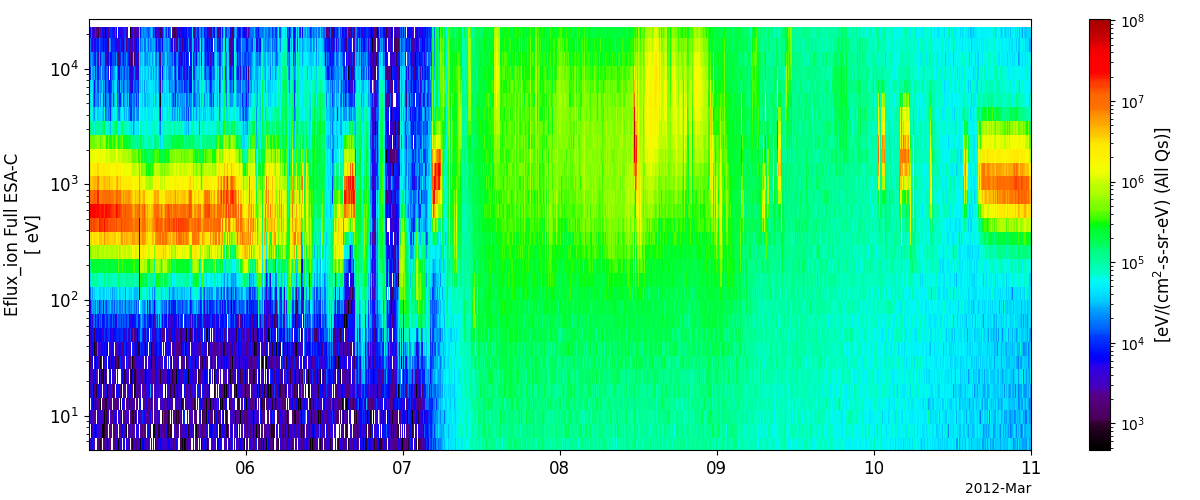

In [16]:
data_class.plot_pyspedas("C_ion_eflux")

In [11]:
tplot('thb_peif_en_eflux')

15-Sep-25 16:00:28: wildcard_expand: No match found for thb_peif_en_eflux
15-Sep-25 16:00:28: tplot: No matching tplot names were found


14-Sep-25 14:40:06: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(



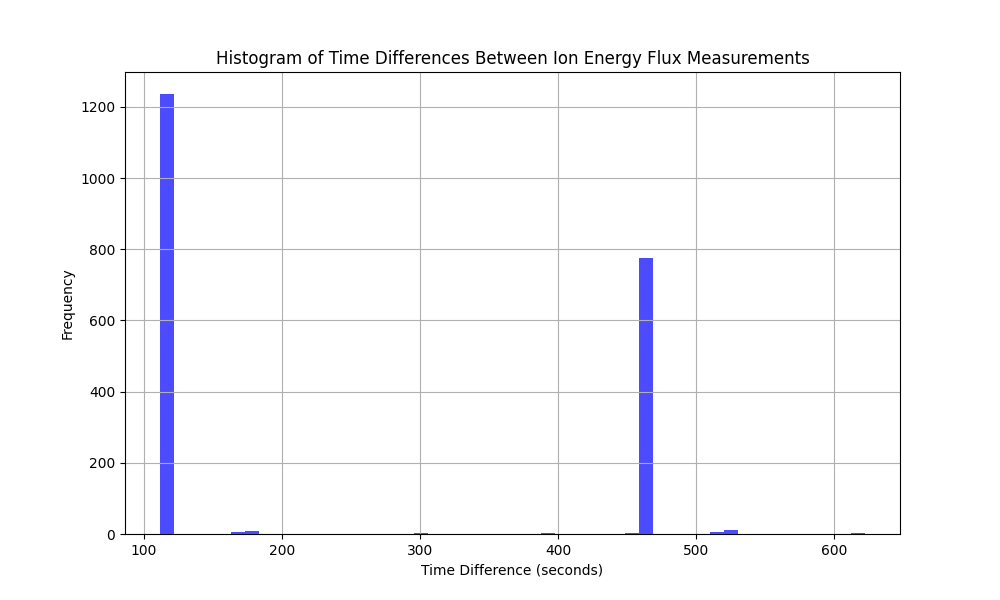

In [26]:
# Calculate the time differences between measurements
dt_ion_eflux = ion_eflux_var['data']['times'][1:] - ion_eflux_var['data']['times'][:-1]


# Convert timedelta to seconds for plotting
dt_ion_eflux_seconds = dt_ion_eflux / np.timedelta64(1, 's')

# Create histogram of time differences
plt.figure(figsize=(10, 6))
plt.hist(dt_ion_eflux_seconds, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Time Differences Between Ion Energy Flux Measurements')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

